In [15]:
# place folder `PNlib` near to *.ipynb, 
# or make symbolic / junction link (Windows: mklink /j PNlib "c:\dir\PNlib")

In [16]:
from PNlib import PolyNumConf
PolyNumConf.max_N=32 # PN significant digits number (restart jupyter kernel on change)
from PNlib.PolyNum import PolyNum

# Discrete representations of generalized time domain functions

## Laplace transform

The functions of continuous time defined for $t \geq 0$, can be expressed in **Mikusinski's operational calculus** in form of functions of **Heaviside's operator** $ p = \cfrac{1}{\int_0^t} $ where $X(p)$ denote $\color{magenta}{\text{Laplace transform}}$ formulas: 

$$
\{ x (t) \} = \color{magenta}{X(p)} \color{brown}{ \cdot p \cdot \{1\} }
$$

$ \{1\} $ denotes function, with value $ 1 $ for all $ t \geq 0 $.

For example $ \{ 200\ sin(t) \} = \color{magenta}{200\ \cfrac{2}{p^2 + 4}} \color{brown}{  \cdot  p \cdot \{1\} }$.

##  Z-transform

Z-transform corresponds to $ \{ x (t) \} $ is determined by series of samples in discrete time $ t_k = k\ h $, where $ k = 0, 1,\dots$ and $ h $ is the sampling period:

$$
\underline{x} = (^\sim x_0\!^\sim, x_1\!^\sim x_2\!^\sim \dots ^\sim) = \left.(x_0 \,z^0 + x_1 \,z^{-1} + x_2 \,z^{-2} + \dots)\right|_{z\,=\,(^\sim 1 ^\sim 0 ^\sim)}\\
$$

Replacing continuous time function $\{1\}$ by sequence of samples $
(^\sim 0.5^\sim, 1^\sim 1^\sim1^\sim \dots^\sim)
$
and replacing Heaviside operator $ p $ utilizing algorithm of numerical integration
$$
\underline{p} = \frac{2}{h} \left.\frac{1 - z^{-1}}{1 + z^{-1}}\right|_{z = (^\sim 1 ^\sim 0 ^\sim)} 
= \frac{2}{h} \frac{(^\sim 1 ^\sim , -1 ^\sim)}{(^\sim 1 ^\sim , 1 ^\sim)}
= \frac{1}{h}\ (^\sim 2^\sim, -4^\sim 4^\sim -4^\sim \dots^\sim) \\
$$
we obtain expression for approximate sequence of samples of function $\{ x(t) \}$:


$$
\\
\underline{x} = \color{magenta}{X (\underline{p})} \color{brown}{  \cdot \underline{p} \cdot (^\sim0.5^\sim, 1^\sim1^\sim1^\sim \dots ^\sim) }
$$

This way we get discrete samples of abstract functions, like derivative of non-smooth function, like $ \{x_a(t)\} = \{ \cfrac{\mathrm{d}}{\mathrm{d}t} \delta(t) \} = \color{brown}{ p \cdot \{1\} \cdot \ } \color{magenta}{p} $, where Laplace transform  $ \color{magenta}{X(p) = p} $ or function containing negative delay, like $ \{x_b(t)\} = \color{brown}{ p \cdot \{1\} \cdot \ } \color{magenta}{ \cfrac{1}{p^2 + p + 4}\ \exp(-(-0.1)\sqrt{p^2 +1}) } $ 
(see
[Mikusinski's remarks about negative delay operator](http://www.pei.prz.edu.pl/~kubaszek/smacd06/JM_OperCalc.html)).

In [17]:
%matplotlib notebook
from ipywidgets import *

In [18]:
import matplotlib.pyplot as plt
plt.rc('lines', linewidth=1)

In [19]:
# Z-transform (live example):
f_1111 = 0.5 * PolyNum('const:(~1~,2~2~2~2~...~)')
p_tr = PolyNum('const:(~2~,-4~4~-4~4~...~)')
# p_trap(h) = (2/h)*(~1~-1~) / (~1~1~) = (1/h) * (~2~,-4~4~-4~4~...~)

- - - -
## Derivative of the step function on input of black box:  

$ \{x_a(t)\}  = \{ \cfrac{\mathrm{d}^a}{\mathrm{d}t^a} \delta(t) \} = \color{brown}{ p \cdot \{1\} \cdot \ } \color{magenta}{p^a} $ 


<IPython.core.display.Javascript object>


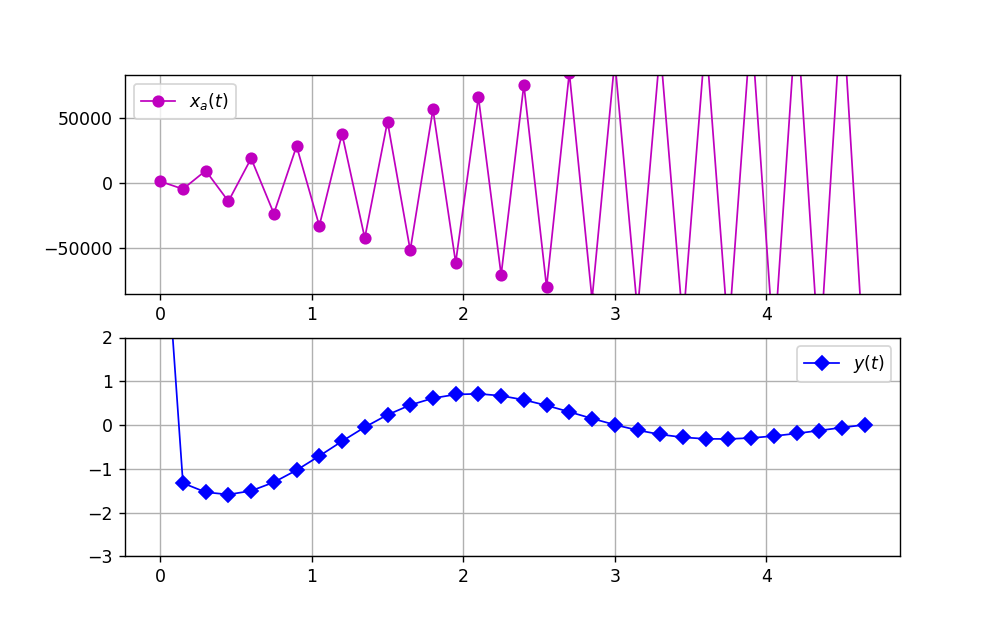

interactive(children=(FloatSlider(value=2.0, description='a', max=2.6, min=-1.0), FloatSlider(value=0.15, description='h', max=0.2, min=0.05, step=0.01), Output()), _dom_classes=('widget-interact',))

In [22]:
# interactive plot:
h = 0.15
p = 1/h * p_tr
blackBox1 = 1 / (p**2 + p + 4)
t = [k*h for k in range(len(p))]
fig = plt.figure(figsize=(8,5))
a = 1.9
x_a =  f_1111 * p**(a+1) # p * f_1111 * p**a
ax1 = fig.add_subplot(2, 1, 1)
ax1.grid(b=True)
ax2 = fig.add_subplot(2, 1, 2)
ax2.grid(b=True)
ax2.set_ylim((-3.0, 2.0))
x_line, = ax1.plot(t, x_a , 'm-o', label='$ x_a(t) $')
y_line, = ax2.plot(t, x_a * blackBox1, 'b-D', label='$ y(t) $')
ax1.legend()
ax2.legend()

def update(a=2.0, h=0.15):
    p = 1/h * p_tr
    blackBox1 = 1 / (p**2 + p + 4)
    t = [k*h for k in range(len(p))]
    x_a =  f_1111 * p**(a+1)
    x_line.set_xdata(t)
    x_line.set_ydata(x_a)
    y_line.set_xdata(t)
    y_line.set_ydata(x_a * blackBox1)
    fig.canvas.draw()

interact(update, a=(-1,2.6,0.1), h=(0.05,0.2,0.01));


Although $ x_a(t) $ is "unrealistic function" ($ (a+1) $ - derivative of the step function), it samples can be generated and applied into input of black box. For $ a \le 2.0 $ output of black box gives samples of "realistic function" $ y(t) $, that means - smaller $ h $ leads to  more accurate $ y(t) $. For $ a > 2.0 $ output is not convergent with decreasing $ h $.

- - - -

## Delay operator with negative delay on input of black box:

$ \{x_b(t)\} = \color{brown}{ p \cdot \{1\}\, \cdot } \color{magenta}{ \exp(-(-b)\, p) } $ 

<IPython.core.display.Javascript object>


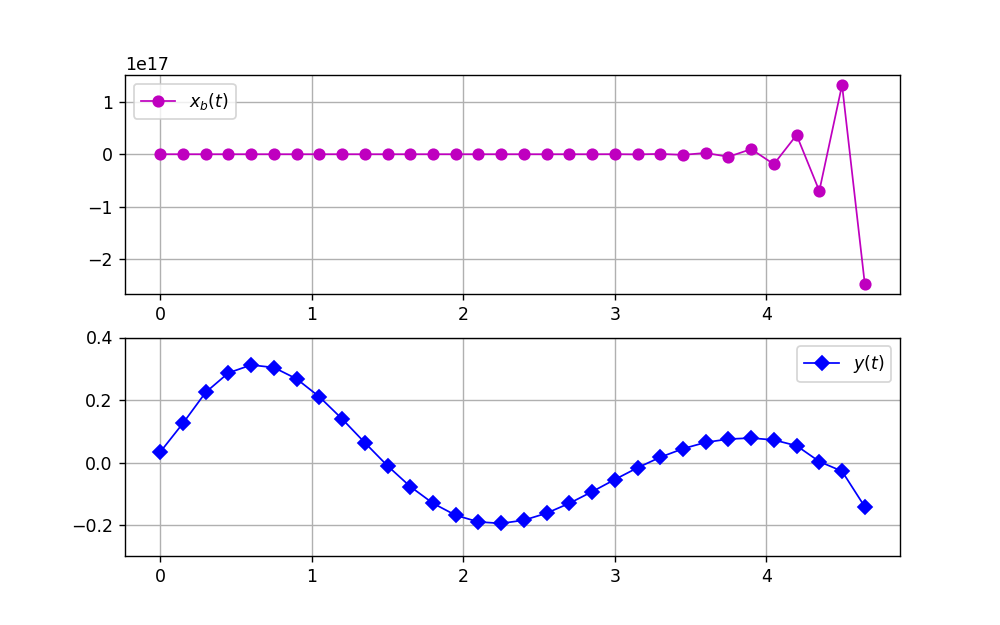

interactive(children=(FloatSlider(value=0.5, description='b', max=1.0, min=-1.0, step=0.02), FloatSlider(value=0.15, description='h_', max=0.2, min=0.05, step=0.01), Output()), _dom_classes=('widget-interact',))

In [23]:
# interactive plot:
h_ = 0.15
p_ = 1/h_ * p_tr
blackBox2 = 1 / (p_**2 + p_ + 4) * ( -0.5 * ( (p_**2 +1).sqrt() ) ).exp()
t_ = [k*h_ for k in range(len(p_))]
fig_ = plt.figure(figsize=(8,5))
b = 0.5
x_b = p_ * f_1111 * (b*p_).exp()
ax1_ = fig_.add_subplot(2, 1, 1)
ax1_.grid(b=True)
ax2_ = fig_.add_subplot(2, 1, 2)
ax2_.grid(b=True)
ax2_.set_ylim((-0.3,0.4))
x_line_, = ax1_.plot(t_, x_b , 'm-o', label='$ x_b(t) $')
y_line_, = ax2_.plot(t_, x_b * blackBox2, 'b-D', label='$ y(t) $')
ax1_.legend()
ax2_.legend()

def update_(b = 0.5, h_=0.15):
    p_ = 1/h_ * p_tr
    blackBox2 = 1 / (p_**2 + p_ + 4) * ( -0.5 * ( (p_**2 +1).sqrt() ) ).exp()
    t_ = [k*h_ for k in range(len(p_))]
    x_b = p_ * f_1111 * (b*p_).exp()
    x_line_.set_xdata(t_)
    x_line_.set_ydata(x_b)
    y_line_.set_xdata(t_)
    y_line_.set_ydata(x_b * blackBox2)
    fig_.canvas.draw()

interact(update_, b=(-1,1,0.02), h_=(0.05,0.2,0.01));

Although $ x_b(t) $ is "unrealistic function" (pure delay operator with negative delay), it samples can be generated and applied into input of black box. For $ b \le 0.5 $ output of black box gives samples of "realistic function" $ y(t) $, that means - smaller $ h\_ $ leads to  more accurate $ y(t) $. For $ b > 0.5 $ output is not convergent with decreasing $ h\_ $.

- - - -
[<<<... 04. PN generalized time domain functions ...](04.PN generalized time domain functions.ipynb) _ | _ [... 00. index ...>>>](../index.ipynb)